### Visualisierung - 35Min
---  
## ``Untersuchen der Haupteinflüsse auf die Emotionen über die Sprache``



#### Inhalt <br>
- Visuelle Untersuchung eines Datasets
- Erstellen grundlegender Diagramme
- Darstellen von Beziehungen zwischen Attribute eines Datasets


---
# **``Daten Import``**


## ``Einlesen und prüfen der Datenstruktur``

**Verwende für die Übung folgende Daten:**
* Dataset: *[data/automobileEDA.csv](data/automobileEDA.csv)*
<br>*Beachte evtl vorhandene Metadaten*<br>

Lies die angegebenden Datasets ein und kontrolliere den Aufbau der eingelesenen Daten.


In [1]:
import warnings
#warnings.simplefilter("ignore", category=FutureWarning)
# ---> Dein Code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-----------------------------------------------------------------

# ---> Dein Code



Gib die ersten fünf Zeilen der eingelesenen Daten aus.

In [2]:
# ---> Dein Code
df.head()

,Speech Duration,Pitch,Speech Rate,Jitter,Shimmer,MFCCs,Mood,Sentiment Score,Speaker ID,Age Group,Gender,Language
0,18.02,138.88,77,0.018,0.020,"[2.508, -0.059, -4.787, -3.823, 7.839, 4.188, ...",Sad,-0.29,d969902b-9016-4fbe-912c-657c64094e6e,Child,Male,English
1,3.66,284.85,165,0.036,0.046,"[7.142, 7.646, 0.855, 5.951, -0.062, 3.756, 4....",Surprised,0.46,188e3a5c-21be-45ce-a35e-68fc8809b099,Senior,Male,English
2,8.93,179.56,117,0.027,0.083,"[3.557, -5.489, 0.748, 0.675, 9.397, -6.319, 4...",Neutral,0.00,7e9b7dfc-2437-405a-9bbb-20d150676e29,Senior,Female,English
3,12.41,218.57,132,0.053,0.038,"[9.45, -6.478, -7.879, -6.744, 3.796, -7.392, ...",Fearful,-0.37,8c28d2c1-1bbf-49e1-9c2a-eaf132279035,Child,Male,English
4,12.32,153.69,63,0.015,0.033,"[-0.875, 5.894, -8.461, 6.59, -7.81, -0.885, -...",Bored,-0.18,43a54995-e8f3-4a65-9b8c-e3cd23c85396,Senior,Female,English


Gib den Aufbau des Datasets aus.

In [3]:
# ---> Dein Code
zeilen,spalten = df.shape

print("Zeilen:", zeilen)
print("Spalten:", spalten)

Zeilen: 10000
Spalten: 12


Untersuche weiters den Typ und die Vollständigkeit der einzelnen Attribute.

In [4]:
# ---> Dein Code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Speech Duration  10000 non-null  float64
 1   Pitch            10000 non-null  float64
 2   Speech Rate      10000 non-null  int64  
 3   Jitter           10000 non-null  float64
 4   Shimmer          10000 non-null  float64
 5   MFCCs            10000 non-null  object 
 6   Mood             10000 non-null  object 
 7   Sentiment Score  10000 non-null  float64
 8   Speaker ID       10000 non-null  object 
 9   Age Group        10000 non-null  object 
 10  Gender           10000 non-null  object 
 11  Language         10000 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 937.6+ KB


<div style="background-color:rgba(250, 0, 0, 0.1)">

---
**Beschreibe und beurteile die erhaltenen Informationen!**<br>  
 
Füge hier deine Antwort ein




---
</div>

---
# ``Data Exploration``


Erstelle zuerst eine explorative Datenanalyse anhand der ``statistischen Kennzahlen`` ALLER ``Features`` (Attribute).

Die Methode ``describe`` zeigt

-    Anzahl der Daten eines Features
-    den Durchschnitt
-    die Standardabweichung (std) 
-    den kleinsten Wert
-    den Interquartile Bereich: 25%, 50% and 75%
-    den größten Wert


In [5]:
# ---> Dein Code

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Speech Duration,10000.0,10.810561,3.847962,3.00,7.8500,10.590,13.5325,20.00
Pitch,10000.0,201.265675,57.010200,100.07,153.9725,194.635,244.7250,349.81
Speech Rate,10000.0,124.036700,41.522403,50.00,91.0000,124.000,156.0000,220.00
Jitter,10000.0,0.055192,0.026077,0.01,0.0320,0.055,0.0780,0.10
Shimmer,10000.0,0.055023,0.025948,0.01,0.0330,0.055,0.0780,0.10
Sentiment Score,10000.0,0.007480,0.442960,-0.90,-0.3200,0.000,0.3300,0.90


Standardmäßig übergeht ``describe`` alle **nicht-numerischen** Attribute (Kategorische Daten mit Typ: *object*).  
Um diese ebenfalls zu untersuchen muss dies mit dem Parameter ``include=['object']`` erfolgen.

In [6]:
# ---> Dein Code
df.describe(include=['object'])

,MFCCs,Mood,Speaker ID,Age Group,Gender,Language
count,10000,10000,10000,10000,10000,10000
unique,10000,10,10000,3,2,1
top,"[5.441, 1.059, 9.12, -3.179, 2.591, -1.258, 6....",Sad,9f8d566c-6d5a-4d07-be0b-4dbd37ae1dc4,Child,Male,English
freq,1,1030,1,3395,5014,10000


### Value_counts


Mit der Methode ``value_counts`` kann ermittelt werden, wieviele Datensätze für jeden Wert eines Attributs vorhanden sind.  
Das hilft um zu ermitteln, welche Kategorien eines Attributs es gibt und wie oft jede Kategorie vorhanden ist.

Ermittle für das Attribut ``Mood`` die vorhandenen Kategorien und wie oft jede Kategorie vorkommt.  
(Beachte dabei, dass die Methode ``value_counts`` nur auf *Pandas-Serien* funktioniert, nicht auf *Pandas-Dataframes*.) 


In [7]:
# ---> Dein Code

df['Mood'].value_counts()


Mood
Sad          1030
Happy        1030
Excited      1013
Fearful      1013
Angry        1005
Bored        1003
Calm          992
Surprised     980
Confused      980
Neutral       954
Name: count, dtype: int64

---
# ``Visuelle Analyse der Daten``


<div style="background-color:rgba(250, 250, 0, 0.1)">

---
## `Liniendiagramme`<br> Verlauf von Daten
---

Untersuche den Verlauf einzelner Features mittels Liniendiagramm.<br>
https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot

Erstelle dafür in den freien Subplots geeigneten Diagrammen. Überlege dabei
- welche Liniendiagramme noch sinnvoll sind und
- wie du sie interpretieren kannst.

Beschrifte die Diagramme und Achsen entsprechend.




---

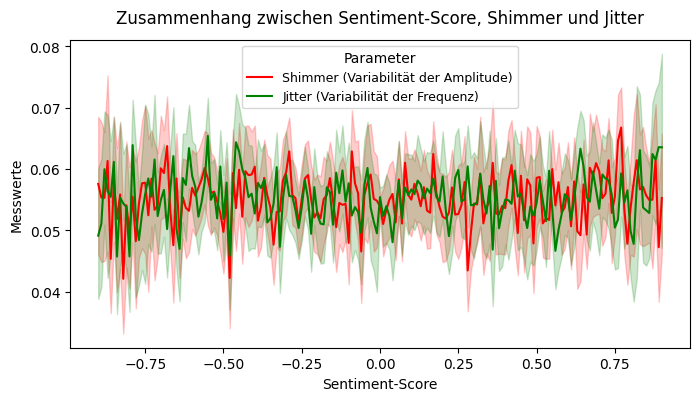

In [11]:
# Import Bibliotheken
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# falls nötig, kannst du so die Größe des Diagramms festlegen
plt.subplots(figsize=(8, 4))

# erstes Diagramm (ax ist der Zeichenbereich, brauchen wir für Titel usw.)
ax = sns.lineplot(data=df, x='Sentiment Score', y='Shimmer', color='r', label="Shimmer (Variabilität der Amplitude)")

# zweites Diagramm einzeichnen
sns.lineplot(data=df, x='Sentiment Score', y='Jitter', color='g', label="Jitter (Variabilität der Frequenz)")

# Beschriften
ax.set_title("Zusammenhang zwischen Sentiment-Score, Shimmer und Jitter", fontsize=12, pad=12)
ax.set_xlabel('Sentiment-Score', fontsize=10)
ax.set_ylabel('Messwerte', fontsize=10)
ax.legend(title="Parameter", fontsize=9, title_fontsize=10)

# Diagramm anzeigen
plt.show()


Erstelle für die weiteren Untersuchen die Liniendiagramme in einer Übersicht aus Subplots.<br>
Fülle die noch leeren Subplots mit eigenen Auswertungen. 

<Axes: xlabel='price', ylabel='horsepower'>

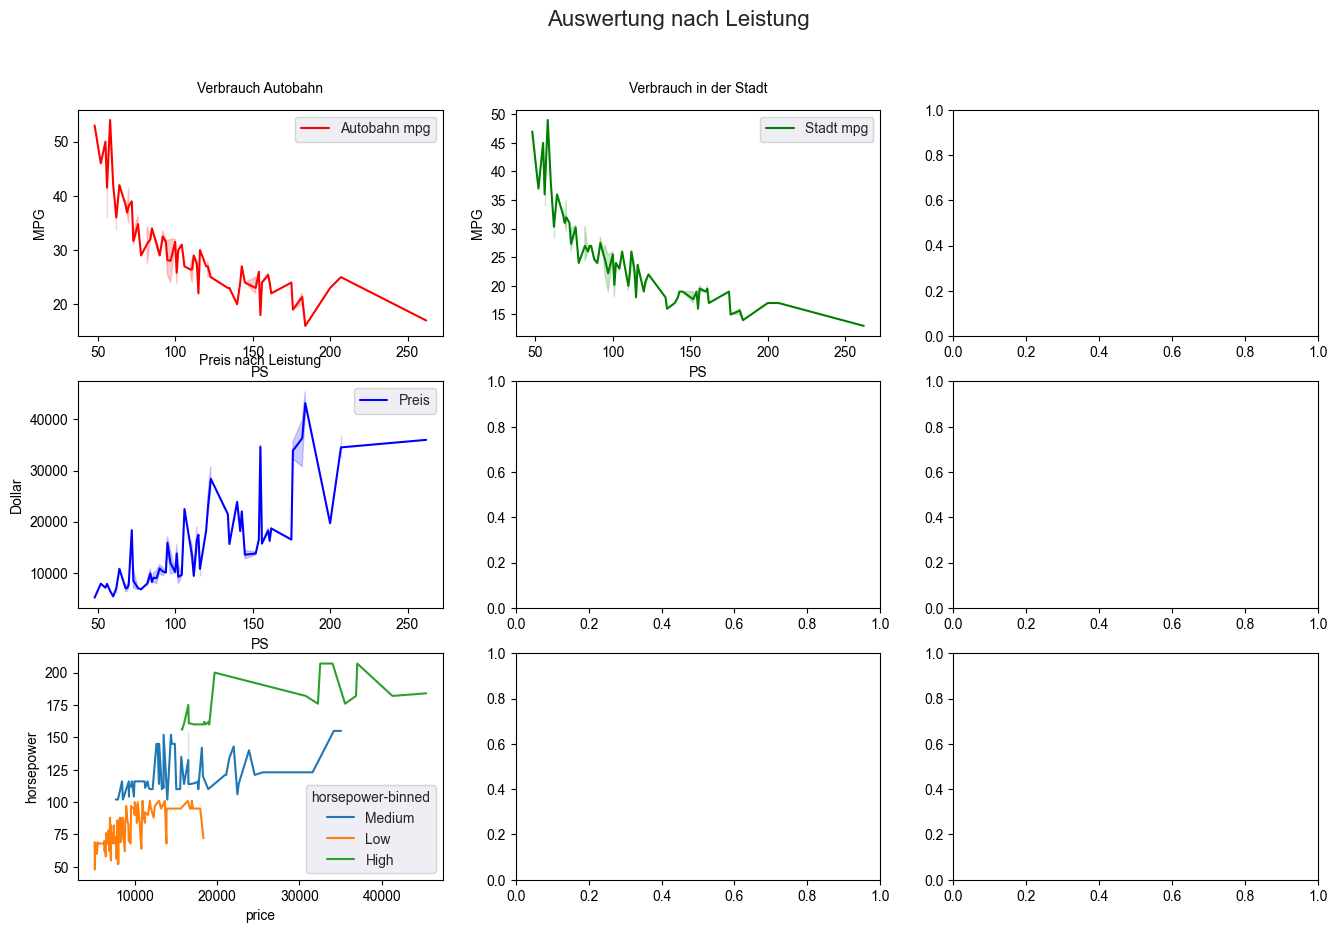

In [9]:
# Mehrere Zeichenbereich erstellen
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16,10))

# Linie einzeichnen
sns.set_style("darkgrid")

# Hauptüberschrift
plt.suptitle("Auswertung nach Leistung", fontsize=16)

# erstes Diagramm (ax ist der Zeichenbereich, brauchen wir für Titel usw.)
ax=sns.lineplot(ax=axs[0][0], data=df, 
                x='horsepower', y='highway-mpg', color='r', label="Autobahn mpg")
ax.set_title("Verbrauch Autobahn", fontsize=10, pad=12)
ax.set_xlabel('PS')
ax.set_ylabel('MPG')

# zweites Diagramm einzeichen
ax=sns.lineplot(ax=axs[0][1], data=df, 
                x='horsepower', y='city-mpg', color='g', label="Stadt mpg")
ax.set_title("Verbrauch in der Stadt", fontsize=10, pad=12)
ax.set_xlabel('PS')
ax.set_ylabel('MPG')

# Verbrauch und Preis
ax=sns.lineplot(ax=axs[1][0], data=df, 
                x='horsepower', y='price', color='b', label="Preis")
ax.set_title("Preis nach Leistung", fontsize=10, pad=12)
ax.set_xlabel('PS')
ax.set_ylabel('Dollar')

# Verbrauch gruppiert
sns.lineplot(ax=axs[2][0], data=df, 
            x='price', y='horsepower', hue="horsepower-binned")


# Füge selbst weitere Auswertungen nach dem Preis hier ein
# ---> Dein Code




<div style="background-color:rgba(250, 250, 0, 0.1)">

---
## `Histogramme`<br> Verteilung der Daten
---

Untersuche die Verteilung der einzelnen Features mittels Histogrammen.

Erstelle dafür in den freien Subplots geeigneten Diagrammen. Überlege dabei
- welche Histogramme noch sinnvoll sind
- welche Klassifizierung (Unterscheidung) du visualisieren kannst und  
- wie du sie interpretieren kannst.

Beschrifte die Diagramme und Achsen entsprechend.




---

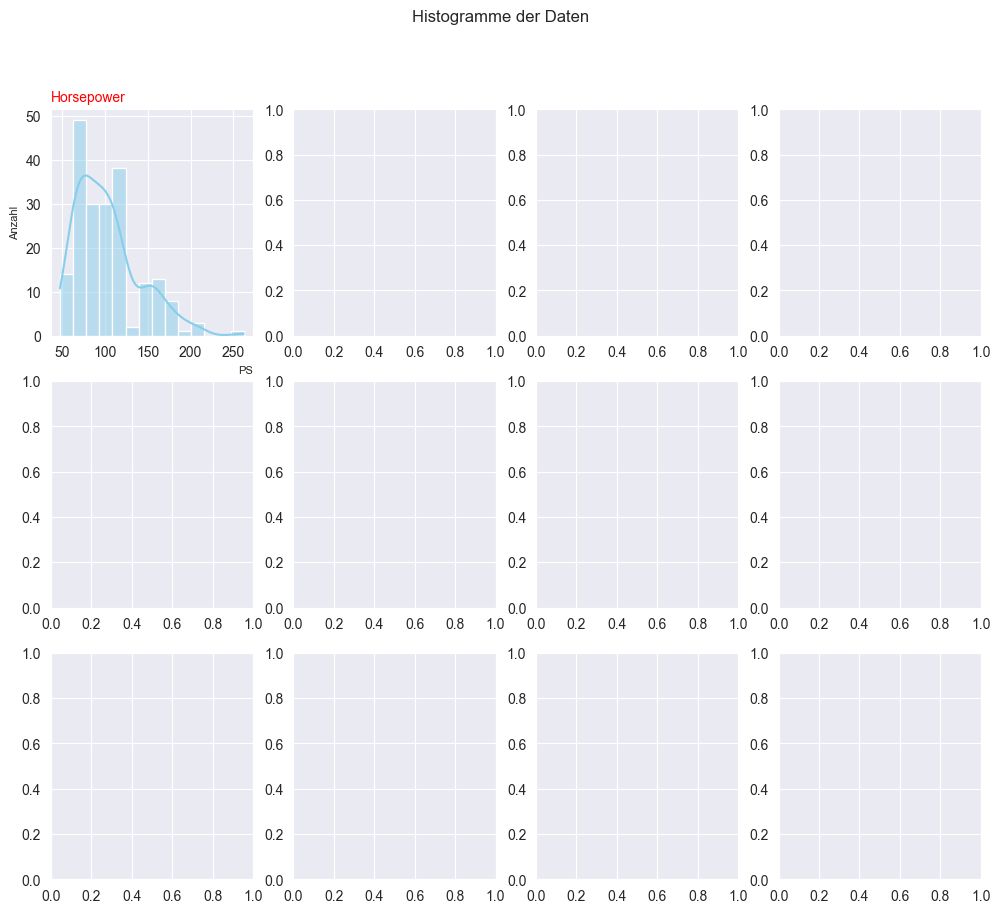

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ----------------------------------------------------------
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
fig.suptitle('Histogramme der Daten', fontsize=12)

# -----------------------------------------------------------
plt.rcParams.update(plt.rcParamsDefault)    # Plot auf Defaultwerte zurücksetzen
plt.rc('xtick', labelsize=8)                # Default Fontsize überschreiben
plt.rc('ytick', labelsize=8) 
sns.set_style("whitegrid")


# ----------------------------------------------------------
# Erstelle ein Histogramm in einem der Plots
ax=sns.histplot(data=df, x="horsepower", kde=True, color="skyblue", ax=axs[0, 0])
ax.set_title('Horsepower', loc='left',color='r', fontsize=10)
ax.set_xlabel('PS', loc='right', fontsize=8)
ax.set_ylabel('Anzahl', fontsize=8)

#---------------------------------------------------------
# Erstelle in jedem noch leeren Subplot ein geeignetes Histogramm
# ---> Dein Code


plt.show()

<div style="background-color:rgba(250, 0, 0, 0.1)">

---
**Interpretation**<br>  

Füge hier deine Interpretation der Diagramme ein!





---
</div>

<div style="background-color:rgba(250, 250, 0, 0.1)">

---
## `Boxplots`<br> Verteilung und Lage
---

Untersuche die Verteilung der einzelnen Features mittels Boxplots.

Erstelle dafür in den freien Subplots geeigneten Diagrammen. Überlege dabei
- welche Boxplots noch sinnvoll sind
- welche Klassifizierung (Unterscheidung) du visualisieren kannst und  
- wie du sie interpretieren kannst.

Beschrifte die Diagramme und Achsen entsprechend.


---

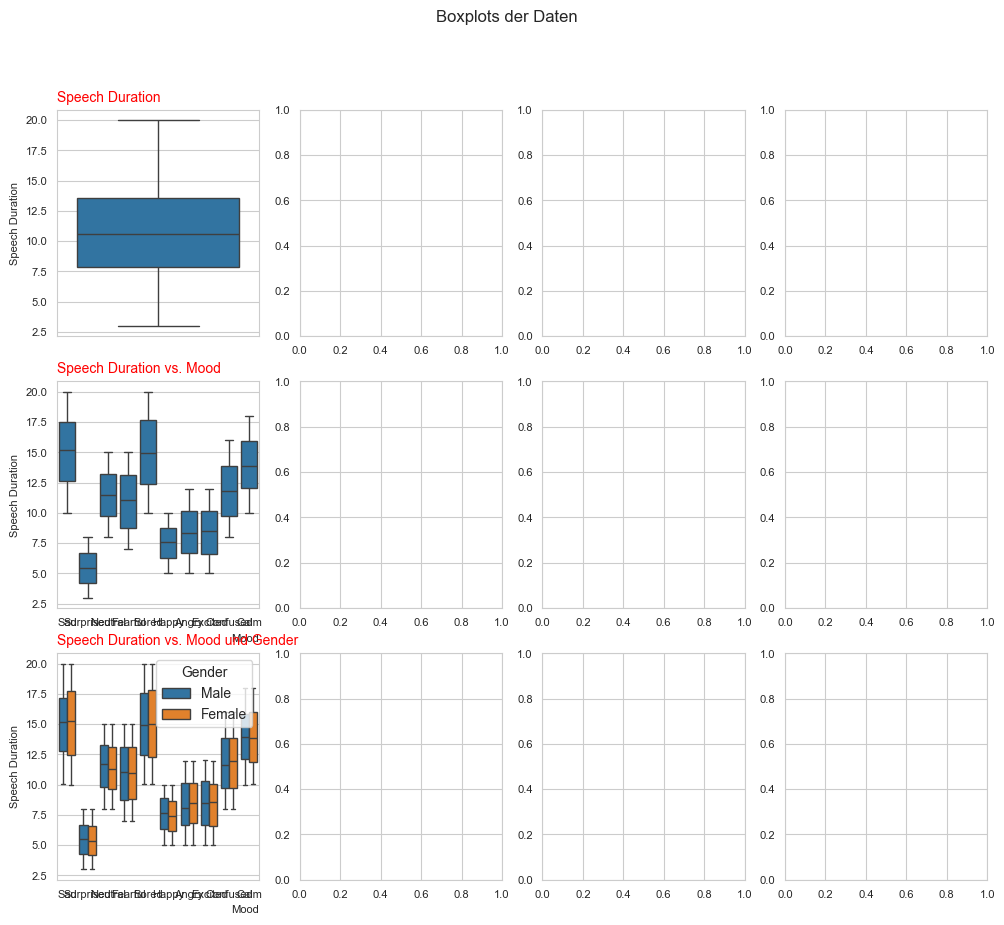

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------------
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
fig.suptitle('Boxplots der Daten', fontsize=12)

# -----------------------------------------------------------
plt.rcParams.update(plt.rcParamsDefault)    # Plot auf Defaultwerte zurücksetzen
plt.rc('xtick', labelsize=8)                # Default Fontsize überschreiben
plt.rc('ytick', labelsize=8) 
sns.set_style("whitegrid")


# ----------------------------------------------------------
# Erstelle ein Boxplot in einem der Plots
ax=sns.boxplot(y="Speech Duration", data=df, ax=axs[0][0])
ax.set_title('Speech Duration', loc='left',color='r', fontsize=10)
ax.set_ylabel('Speech Duration', fontsize=8)

# ----------------------------------------------------------
# Erstelle ein Boxplot in einem der Plots
ax=sns.boxplot(y="Speech Duration", x='Mood', data=df, ax=axs[1][0])
ax.set_title('Speech Duration vs. Mood', loc='left',color='r', fontsize=10)
ax.set_xlabel('Mood', loc='right', fontsize=8)
ax.set_ylabel('Speech Duration', fontsize=8)

# ----------------------------------------------------------
# Erstelle ein Boxplot in einem der Plots
ax=sns.boxplot(y="Speech Duration", x='Mood', hue='Gender', data=df, ax=axs[2][0])
ax.set_title('Speech Duration vs. Mood und Gender', loc='left',color='r', fontsize=10)
ax.set_xlabel('Mood', loc='right', fontsize=8)
ax.set_ylabel('Speech Duration', fontsize=8)

#---------------------------------------------------------
# Suche für jeden noch leeren Subplot eine geeignete Spalte und
# erstelle dafür ein Boxplot
# ---> Dein Code



plt.show()

<div style="background-color:rgba(250, 0, 0, 0.1)">

---
**Interpretation**<br>  

Füge hier deine Interpretation der Diagramme ein!





---
</div>

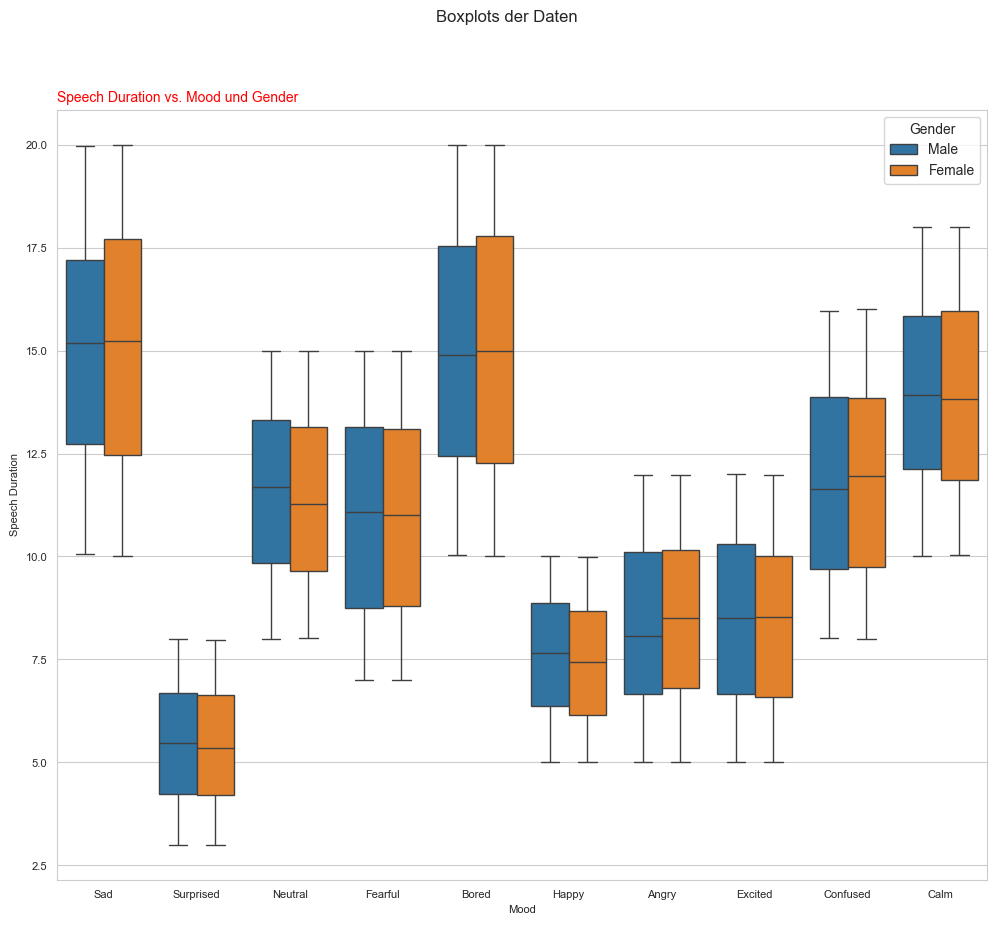

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------------
fig, axs = plt.subplots(figsize=(12, 10))
fig.suptitle('Boxplots der Daten', fontsize=12)

# -----------------------------------------------------------
plt.rcParams.update(plt.rcParamsDefault)    # Plot auf Defaultwerte zurücksetzen
plt.rc('xtick', labelsize=8)                # Default Fontsize überschreiben
plt.rc('ytick', labelsize=8) 
sns.set_style("whitegrid")


# ----------------------------------------------------------
# Erstelle ein Boxplot in einem der Plots
ax=sns.boxplot(y="Speech Duration", x='Mood', hue='Gender', data=df)
ax.set_title('Speech Duration vs. Mood und Gender', loc='left',color='r', fontsize=10)
ax.set_xlabel('Mood', fontsize=8)
ax.set_ylabel('Speech Duration', fontsize=8)

plt.show()

<div style="background-color:rgba(250, 250, 0, 0.1)">

---
## `Violinplots`<br> Verteilung und Lage
---

Untersuche die Verteilung der einzelnen Features mittels Violinplots.

Erstelle dafür in den freien Subplots geeigneten Diagrammen. Überlege dabei
- welche Violinplots noch sinnvoll sind
- welche Klassifizierung (Unterscheidung) du visualisieren kannst und  
- wie du sie interpretieren kannst.

Beschrifte die Diagramme und Achsen entsprechend.


---

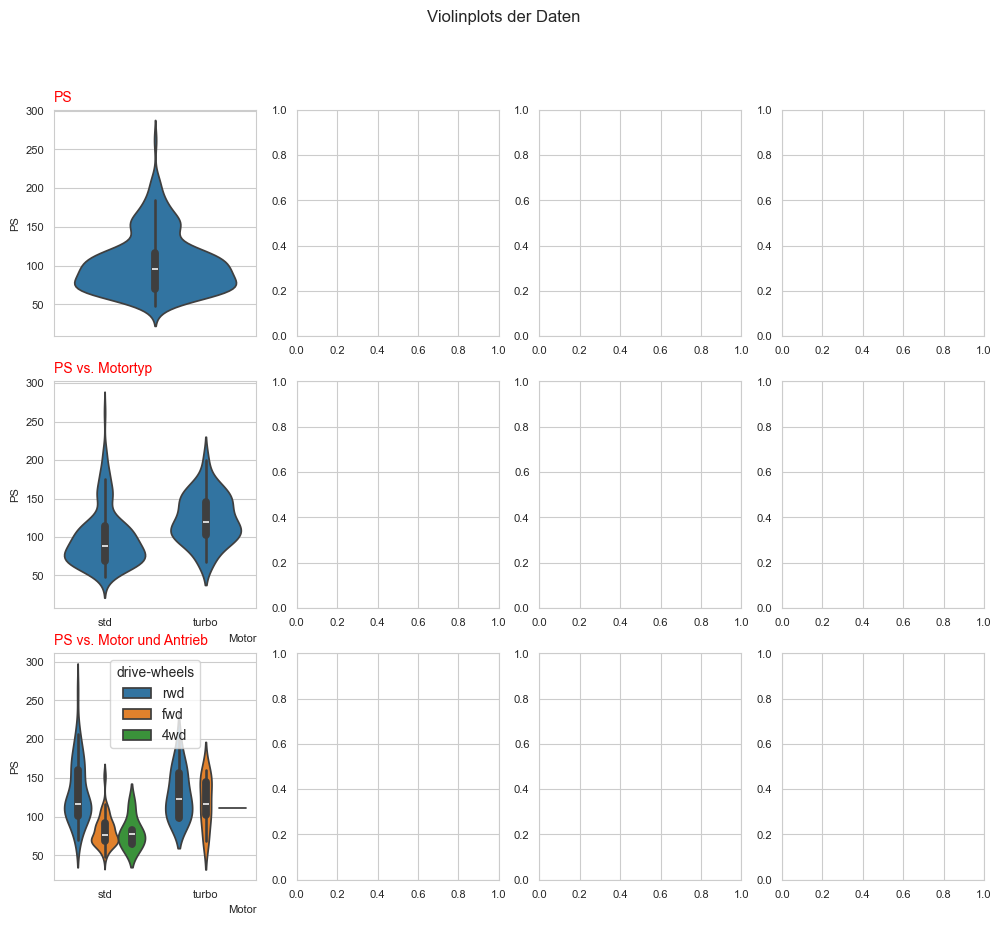

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------------
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
fig.suptitle('Violinplots der Daten', fontsize=12)

# ---> Dein Code

# -----------------------------------------------------------
plt.rcParams.update(plt.rcParamsDefault)    # Plot auf Defaultwerte zurücksetzen
plt.rc('xtick', labelsize=8)                # Default Fontsize überschreiben
plt.rc('ytick', labelsize=8) 
sns.set_style("whitegrid")


# ----------------------------------------------------------
# Erstelle ein Violinplot in einem der Plots
ax=sns.violinplot(y="horsepower", data=df, ax=axs[0][0])
ax.set_title('PS', loc='left',color='r', fontsize=10)
ax.set_ylabel('PS', fontsize=8)

# ----------------------------------------------------------
# Erstelle ein Violinplot in einem der Plots
ax=sns.violinplot(y="horsepower", x='aspiration', data=df, ax=axs[1][0])
ax.set_title('PS vs. Motortyp', loc='left',color='r', fontsize=10)
ax.set_xlabel('Motor', loc='right', fontsize=8)
ax.set_ylabel('PS', fontsize=8)

# ----------------------------------------------------------
# Erstelle ein Violinplot in einem der Plots
ax=sns.violinplot(y="horsepower", x='aspiration', hue='drive-wheels', data=df, ax=axs[2][0])
ax.set_title('PS vs. Motor und Antrieb', loc='left',color='r', fontsize=10)
ax.set_xlabel('Motor', loc='right', fontsize=8)
ax.set_ylabel('PS', fontsize=8)

#---------------------------------------------------------
# Suche für jeden noch leeren Subplot eine geeignete Spalte und
# erstelle dafür ein Violinplot
# ---> Dein Code



plt.show()

<div style="background-color:rgba(250, 0, 0, 0.1)">

---
**Interpretation**<br>  

Füge hier deine Interpretation der Diagramme ein!





---
</div>

<div style="background-color:rgba(250, 250, 0, 0.1)">

---
## `Scatterplots`<br> Zusammenhänge von Features
---

Untersuche die Verteilung der einzelnen Features mittels Scatterplots.

Erstelle dafür in den freien Subplots geeigneten Diagrammen. Überlege dabei
- welche Scatterplots noch sinnvoll sind
- welche Klassifizierung (Unterscheidung) du visualisieren kannst und  
- wie du sie interpretieren kannst.

Beschrifte die Diagramme und Achsen entsprechend.


---

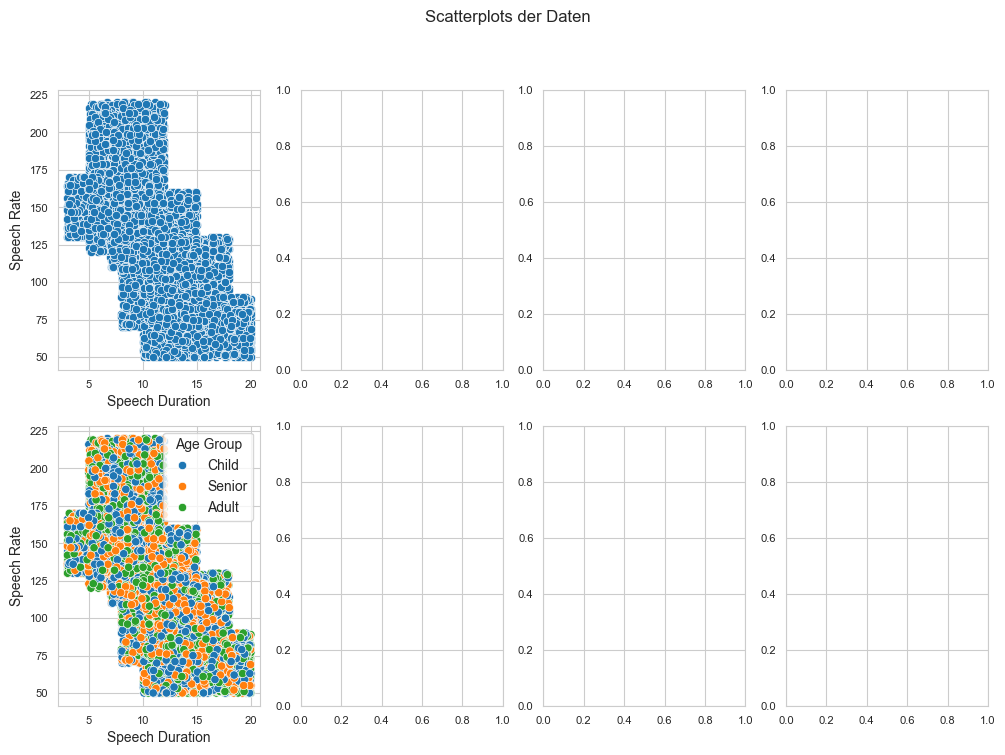

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------------
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
fig.suptitle('Scatterplots der Daten', fontsize=12)

# ---> Dein Code

# -----------------------------------------------------------
plt.rcParams.update(plt.rcParamsDefault)    # Plot auf Defaultwerte zurücksetzen
plt.rc('xtick', labelsize=8)                # Default Fontsize überschreiben
plt.rc('ytick', labelsize=8) 
sns.set_style("whitegrid")

sns.scatterplot(data=df, x="Speech Duration", y="Speech Rate", ax=axs[0, 0],  )
sns.scatterplot(data=df, x="Speech Duration", y="Speech Rate", ax=axs[1, 0], hue='Age Group' )

plt.show()

<div style="background-color:rgba(250, 0, 0, 0.1)">

---
**Interpretation**<br>  

Füge hier deine Interpretation der Diagramme ein!





---
</div>

<div style="background-color:rgba(250, 250, 0, 0.1)">

---
## `Pairplots`<br> Übersicht über ausgewählte Features
---


Erstelle einen Pairplot für die Features:
- ``'price', 'horsepower','peak-rpm','engine-size','highway-mpg','drive-wheels'``
- Klassifiziere die Ausgabe nach Art des Antriebs `drive-wheels`

Beschrifte die Diagramme und Achsen entsprechend.


---

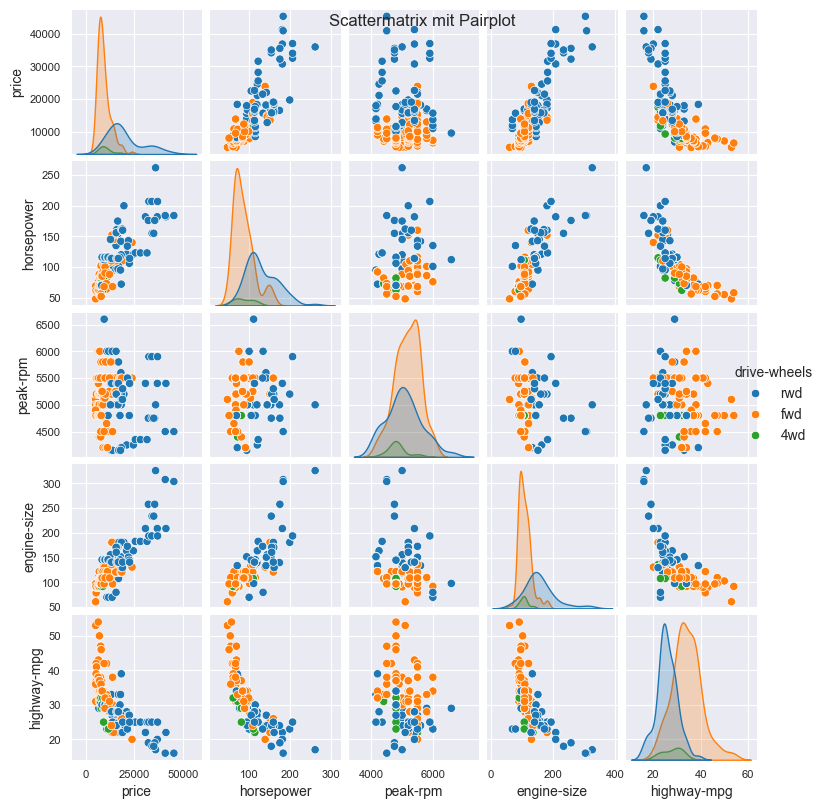

In [14]:
# ---> Dein Code

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

select = ['price', 'horsepower','peak-rpm','engine-size','highway-mpg','drive-wheels']
ax = sns.pairplot(df[select], hue='drive-wheels');
ax.fig.set_size_inches(8,8)

plt.suptitle("Scattermatrix mit Pairplot")
plt.show()

<div style="background-color:rgba(250, 0, 0, 0.1)">

---
**Interpretation**<br>  

Füge hier deine Interpretation der Diagramme ein!





---
</div>

<div style="background-color:rgba(250, 250, 0, 0.1)">

---
## `Korrelation,Heatmap`:<br> Größe des Zusammenhangs einzelner Features
---

Ermittle die Korrelation der numerischen Features mit dem **``Price``** und 
- gib zu erst die ``gesamte Heatmap``

und danach 

- ``NUR`` die Korrelation mit dem ``Preis``
- als ``Absolutwerte``
- ``absteigend sortiert``
- in einer ``Heatmap`` aus

Beschrifte die Diagramme und Achsen entsprechend.



---

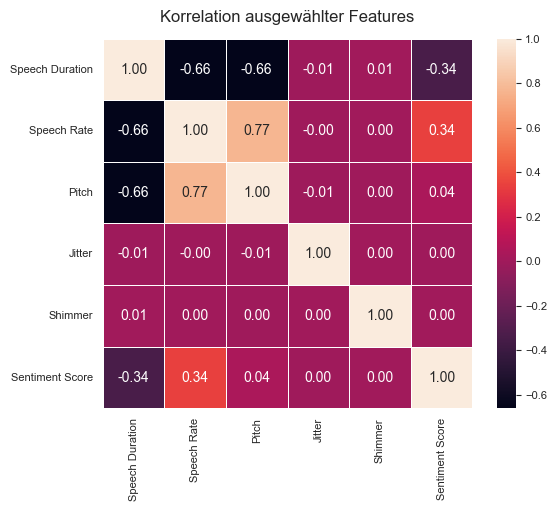

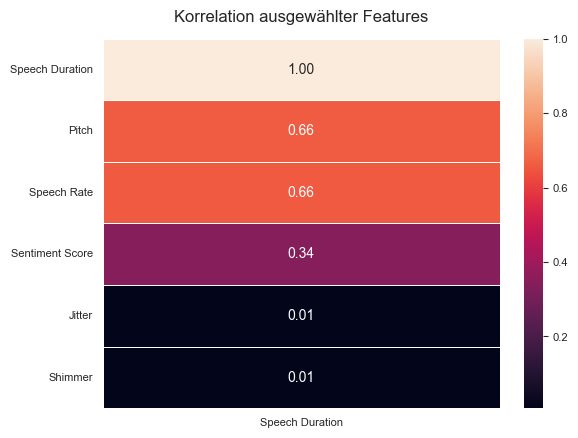

In [29]:
# ---> Dein Code
import seaborn as sns
#sns.set_style("darkgrid")
#sns.set_palette(palette="")
# Erstellen einer Heatmap
select = ['Speech Duration', 'Speech Rate', 'Pitch', 'Jitter', 'Shimmer', 'Sentiment Score']
corr = df[select].corr()

ax = sns.heatmap(corr,square=True, linewidths=.5, annot=True, fmt = '.2f')
ax.set_title("Korrelation ausgewählter Features",fontdict={'fontsize':12}, pad=12)

plt.show()

cols = ['Speech Duration']
corr = df.corr(numeric_only=True).abs()
# sortieren
corr = corr.sort_values(cols, ascending=False)

ax = sns.heatmap(corr[cols],  linewidths=.5, annot=True, fmt = '.2f')
ax.set_title("Korrelation ausgewählter Features",fontdict={'fontsize':12}, pad=12)

plt.show()

<div style="background-color:rgba(250, 0, 0, 0.1)">

---
**Interpretation: Erkläre was der Korrelationskoeffizient von *highway-mpg und price* bedeutet**<br>  

Füge hier deine Erklärung  ein!



**Interpretation: Erkläre was der Korrelationskoeffizient von *horsepower und price* bedeutet**<br>  

Füge hier deine Erklärung  ein!


**Interpretation: Erkläre was der Korrelationskoeffizient von *peak-rpm und price* bedeutet**<br>  

Füge hier deine Erklärung  ein!




---
</div>

<div style="background-color:rgba(250, 250, 0, 0.1)">

---
## `3D-Darstellung`<br> 
---

Gib die Features
- ``horsepower`` 
- ``drive-wheels``
- ``price``
- in einer ``3D-Darstellung`` aus

Beschrifte die Diagramme und Achsen entsprechend.



---

In [16]:
# ---> Dein Code
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,6))
fig.clear()

import plotly.graph_objs as go

layout = go.Layout( height=800,  width=800,
                  #  template='plotly_dark', #template='plotly_white', template='ggplot2', 
                    scene = dict( xaxis = {'title': 'horsepower'},
                                  yaxis = {'title': 'drive-wheels'},
                                  zaxis = {'title': 'price'},
    ))

# ---------------------  Scatterplot für Daten erstellen
plotData = go.Scatter3d(  name='Daten ',
                x= df['horsepower'], 
                y= df['drive-wheels'], 
                z= df['price'],              
                mode='markers',
                marker={ 'size': 5, 'line':dict(width=2) } 
        )

fig = go.Figure(data=[plotData], layout=layout)
fig.show()
